In [3]:
!pip install pandas

  Using cached pandas-2.1.3-cp310-cp310-macosx_11_0_arm64.whl (10.9 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import pickle
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from genetic import fitness

In [3]:
def is_valid(g, s):
    return all(sum(s[v_int] for v in g[n] if (v_int := int(v))) >= 2
               for n in g
               if (n_int := int(n)) and not s[n_int])


### Experimento 4

In [4]:
results = "../results_5"

data = defaultdict(dict)

for filename in os.listdir(results):
    if filename.endswith('.graphml'):
        file_path = os.path.join(results, filename)
        G = nx.read_graphml(file_path)
        index = int(filename.split('.')[0])
        data[index]['g'] = G
    if filename.endswith('.pkl'):
        file_path = os.path.join(results, filename)
        with open(file_path, 'rb') as file:
            r = pickle.load(file)
            index = int(filename.split('.')[0])
            data[index].update(r)

data = pd.DataFrame(data).T
data.sort_index(inplace=True)
data.dropna(inplace=True)
data

,alg,alg_t,gen,gen_t
2,"{0, 1}",0.000045,"{0, 1}",0.037794
4,"{2, 3, 1}",0.000059,"{1, 2, 3}",0.052267
8,"{4, 7, 6, 1, 2}",0.000288,"{1, 2, 4, 6, 7}",0.079548
16,"{14, 0, 5, 7, 3, 12, 10, 1, 9, 2, 13}",0.000149,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",0.136777
32,"{0, 25, 13, 30, 18, 8, 24, 6, 28, 21, 4, 7, 19...",0.000347,"{0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 18, ...",0.248752
64,"{39, 60, 25, 45, 33, 50, 13, 57, 52, 30, 32, 8...",0.001017,"{0, 2, 3, 4, 6, 7, 9, 12, 13, 14, 15, 17, 19, ...",0.464986
128,"{114, 112, 110, 92, 75, 30, 117, 89, 58, 4, 12...",0.003509,"{0, 1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, ...",0.914245
256,"{146, 237, 114, 130, 112, 110, 175, 92, 33, 21...",0.011816,"{0, 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",1.807529
512,"{130, 33, 238, 354, 184, 177, 311, 264, 58, 26...",0.043396,"{1, 2, 4, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18,...",3.602811
1024,"{417, 898, 130, 112, 934, 818, 572, 988, 238, ...",0.17077,"{0, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, ...",7.183168


In [5]:
results = "../results_2"

g_data = defaultdict(dict)

for filename in os.listdir(results):
    if filename.endswith('.graphml'):
        file_path = os.path.join(results, filename)
        G = nx.read_graphml(file_path)
        index = int(filename.split('.')[0])
        g_data[index]['g'] = G

g_data = pd.DataFrame(g_data).T
g_data.sort_index(inplace=True)
g_data.dropna(inplace=True)
g_data

,g
2,"(0, 1)"
4,"(0, 1, 2, 3)"
8,"(0, 1, 2, 3, 4, 5, 6, 7)"
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
64,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
128,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
256,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1024,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [6]:
data = data.merge(g_data, left_index=True, right_index=True)
data

,alg,alg_t,gen,gen_t,g
2,"{0, 1}",0.000045,"{0, 1}",0.037794,"(0, 1)"
4,"{2, 3, 1}",0.000059,"{1, 2, 3}",0.052267,"(0, 1, 2, 3)"
8,"{4, 7, 6, 1, 2}",0.000288,"{1, 2, 4, 6, 7}",0.079548,"(0, 1, 2, 3, 4, 5, 6, 7)"
16,"{14, 0, 5, 7, 3, 12, 10, 1, 9, 2, 13}",0.000149,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",0.136777,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
32,"{0, 25, 13, 30, 18, 8, 24, 6, 28, 21, 4, 7, 19...",0.000347,"{0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 18, ...",0.248752,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
64,"{39, 60, 25, 45, 33, 50, 13, 57, 52, 30, 32, 8...",0.001017,"{0, 2, 3, 4, 6, 7, 9, 12, 13, 14, 15, 17, 19, ...",0.464986,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
128,"{114, 112, 110, 92, 75, 30, 117, 89, 58, 4, 12...",0.003509,"{0, 1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, ...",0.914245,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
256,"{146, 237, 114, 130, 112, 110, 175, 92, 33, 21...",0.011816,"{0, 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",1.807529,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
512,"{130, 33, 238, 354, 184, 177, 311, 264, 58, 26...",0.043396,"{1, 2, 4, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18,...",3.602811,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1024,"{417, 898, 130, 112, 934, 818, 572, 988, 238, ...",0.17077,"{0, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, ...",7.183168,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [7]:
def a_is_valid(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return is_valid(d['g'], s_list)

def a_fitness(d, solution):
    s = d[solution]
    s_list = [False] * len(d.g)
    for n in d.g:
        n_int = int(n)
        s_list[n_int] = n_int in s
    return fitness(d['g'], s_list)

In [8]:
data

,alg,alg_t,gen,gen_t,g
2,"{0, 1}",0.000045,"{0, 1}",0.037794,"(0, 1)"
4,"{2, 3, 1}",0.000059,"{1, 2, 3}",0.052267,"(0, 1, 2, 3)"
8,"{4, 7, 6, 1, 2}",0.000288,"{1, 2, 4, 6, 7}",0.079548,"(0, 1, 2, 3, 4, 5, 6, 7)"
16,"{14, 0, 5, 7, 3, 12, 10, 1, 9, 2, 13}",0.000149,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",0.136777,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
32,"{0, 25, 13, 30, 18, 8, 24, 6, 28, 21, 4, 7, 19...",0.000347,"{0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 18, ...",0.248752,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
64,"{39, 60, 25, 45, 33, 50, 13, 57, 52, 30, 32, 8...",0.001017,"{0, 2, 3, 4, 6, 7, 9, 12, 13, 14, 15, 17, 19, ...",0.464986,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
128,"{114, 112, 110, 92, 75, 30, 117, 89, 58, 4, 12...",0.003509,"{0, 1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, ...",0.914245,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
256,"{146, 237, 114, 130, 112, 110, 175, 92, 33, 21...",0.011816,"{0, 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",1.807529,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
512,"{130, 33, 238, 354, 184, 177, 311, 264, 58, 26...",0.043396,"{1, 2, 4, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18,...",3.602811,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1024,"{417, 898, 130, 112, 934, 818, 572, 988, 238, ...",0.17077,"{0, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, ...",7.183168,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [9]:
data['alg_f'] = data.apply(a_fitness, axis=1, args=('alg', ))
data['gen_f'] = data.apply(a_fitness, axis=1, args=('gen', ))
data['gen_v'] = data.apply(a_is_valid, axis=1, args=('gen', ))
data

,alg,alg_t,gen,gen_t,g,alg_f,gen_f,gen_v
2,"{0, 1}",0.000045,"{0, 1}",0.037794,"(0, 1)",0,1,True
4,"{2, 3, 1}",0.000059,"{1, 2, 3}",0.052267,"(0, 1, 2, 3)",0,2,True
8,"{4, 7, 6, 1, 2}",0.000288,"{1, 2, 4, 6, 7}",0.079548,"(0, 1, 2, 3, 4, 5, 6, 7)",0,6,True
16,"{14, 0, 5, 7, 3, 12, 10, 1, 9, 2, 13}",0.000149,"{0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 14}",0.136777,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,13,True
32,"{0, 25, 13, 30, 18, 8, 24, 6, 28, 21, 4, 7, 19...",0.000347,"{0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 18, ...",0.248752,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,23,False
64,"{39, 60, 25, 45, 33, 50, 13, 57, 52, 30, 32, 8...",0.001017,"{0, 2, 3, 4, 6, 7, 9, 12, 13, 14, 15, 17, 19, ...",0.464986,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,47,False
128,"{114, 112, 110, 92, 75, 30, 117, 89, 58, 4, 12...",0.003509,"{0, 1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, ...",0.914245,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,82,False
256,"{146, 237, 114, 130, 112, 110, 175, 92, 33, 21...",0.011816,"{0, 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",1.807529,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,160,False
512,"{130, 33, 238, 354, 184, 177, 311, 264, 58, 26...",0.043396,"{1, 2, 4, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18,...",3.602811,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,328,False
1024,"{417, 898, 130, 112, 934, 818, 572, 988, 238, ...",0.17077,"{0, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, ...",7.183168,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,643,False


In [10]:
dt = data.iloc[10]
s = dt.alg
s_list = [n in s for n in dt.g]
fitness(dt.g, s_list)

1567

In [11]:
s_list

[True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 

<Axes: >

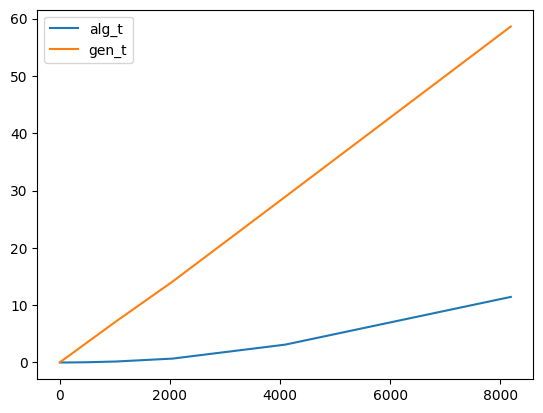

In [12]:
data[["alg_t", "gen_t"]].plot()

<Axes: >

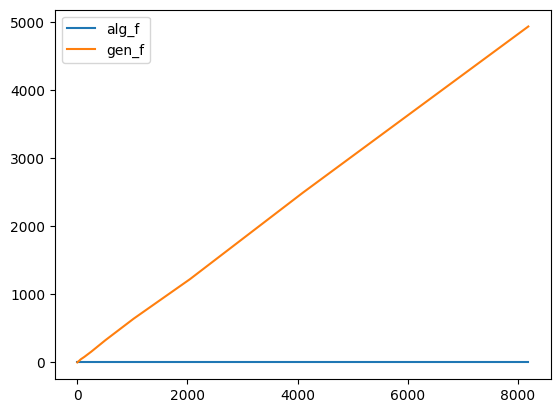

In [13]:
data[["alg_f", "gen_f"]].plot()

In [14]:
data.to_csv('a4')